In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
# Load .env environment variables
load_dotenv()

True

In [3]:
###Set Alpaca API key and secret
alpaca_api_key = os.getenv("api_key_id")
alpaca_secret_key = os.getenv("secret_api_key")
###Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [4]:
 # Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [5]:
###Format current date as ISO format
today = pd.Timestamp("2020-10-09", tz="America/New_York").isoformat()
###Set the tickers
tickers = ["NIO", "WKHS"]
###Set timeframe to '1D' for Alpaca API
timeframe = "1D"
###Get current closing prices for SPY and AGG
stocks_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

###Preview DataFrame
stocks_portfolio

NIO                                    WKHS  \
                            open   high    low  close    volume     open   
2020-10-09 00:00:00-04:00  21.62  21.74  21.32  21.48  70108337  23.8099   

                                                           
                            high    low   close    volume  
2020-10-09 00:00:00-04:00  27.11  23.62  26.755  33059940

In [6]:
# Format start and end dates as ISO format for one year period
start = pd.Timestamp("2020-01-01", tz="America/New_York").isoformat()
end = pd.Timestamp("2021-01-01", tz="America/New_York").isoformat()

In [7]:
# Get closing prices for FB and TWTR from the last year
df_portfolio_year = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end
).df

# Display sample data
df_portfolio_year.head(10)

NIO                                 WKHS          \
                            open   high   low  close     volume  open    high   
2020-01-02 00:00:00-05:00  4.100  4.100  3.61  3.720   97171760  3.06  3.1000   
2020-01-03 00:00:00-05:00  3.500  3.900  3.48  3.830   77393254  3.00  3.1000   
2020-01-06 00:00:00-05:00  4.190  4.240  3.66  3.690   98224315  3.05  3.2500   
2020-01-07 00:00:00-05:00  3.700  3.730  3.21  3.250  100309137  3.23  3.3700   
2020-01-08 00:00:00-05:00  3.140  3.490  3.13  3.385   60130244  3.26  3.4000   
2020-01-09 00:00:00-05:00  3.440  3.580  3.33  3.470   51395446  3.40  3.5400   
2020-01-10 00:00:00-05:00  3.490  3.575  3.40  3.510   33027919  3.41  3.4900   
2020-01-13 00:00:00-05:00  3.705  3.730  3.52  3.700   53898895  3.46  3.6300   
2020-01-14 00:00:00-05:00  3.700  3.820  3.61  3.780   51498100  3.60  3.6800   
2020-01-15 00:00:00-05:00  4.190  4.480  4.00  4.290  213876146  3.65  3.6741   

                                                  
                              low close   volume  
2020-01-02 00:00:00-05:00  2.9650  3.07   918517  
2020-01-03 00:00:00-05:00  2.9800  3.07  1012818  
2020-01-06 00:00:00-05:00  3.0000  3.22   837917  
2020-01-07 00:00:00-05:00  3.2300  3.28  1149498  
2020-01-08 00:00:00-05:00  3.2000  3.39  1610162  
2020-01-09 00:00:00-05:00  3.3311  3.46  1147260  
2020-01-10 00:00:00-05:00  3.2800  3.44   809742  
2020-01-13 00:00:00-05:00  3.3300  3.57  1495357  
2020-01-14 00:00:00-05:00  3.4800  3.65  1168742  
2020-01-15 00:00:00-05:00  3.4500  3.61  1372881

In [8]:
# Create an empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices of FB and TWTR
df_closing_prices["NIO"] = df_portfolio_year["NIO"]["close"]
df_closing_prices["WKHS"] = df_portfolio_year["WKHS"]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Display sample data
df_closing_prices.head(10)

,NIO,WKHS
2020-01-02,3.720,3.07
2020-01-03,3.830,3.07
2020-01-06,3.690,3.22
2020-01-07,3.250,3.28
2020-01-08,3.385,3.39
2020-01-09,3.470,3.46
2020-01-10,3.510,3.44
2020-01-13,3.700,3.57
2020-01-14,3.780,3.65
2020-01-15,4.290,3.61


In [9]:
df_daily_return = df_closing_prices.pct_change()
df_daily_return = df_daily_return.dropna()
df_daily_return.head()

,NIO,WKHS
2020-01-03,0.029570,0.000000
2020-01-06,-0.036554,0.048860
2020-01-07,-0.119241,0.018634
2020-01-08,0.041538,0.033537
2020-01-09,0.025111,0.020649


In [10]:
df_daily_return.dtypes

NIO     float64
WKHS    float64
dtype: object

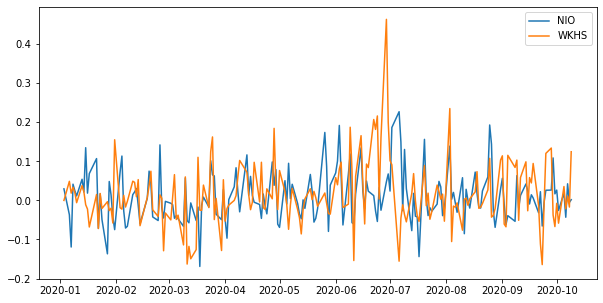

In [11]:
df_daily_return.plot(figsize=(10,5))

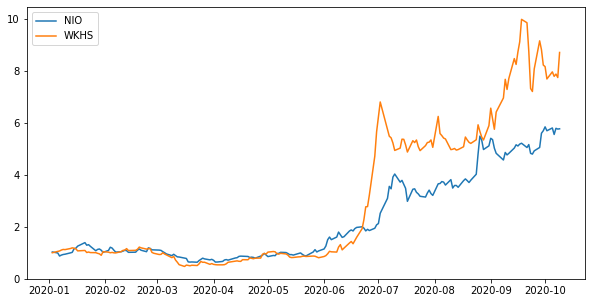

In [12]:
df_cumulative = (1 + df_daily_return).cumprod()
df_cumulative.plot(figsize=(10,5))

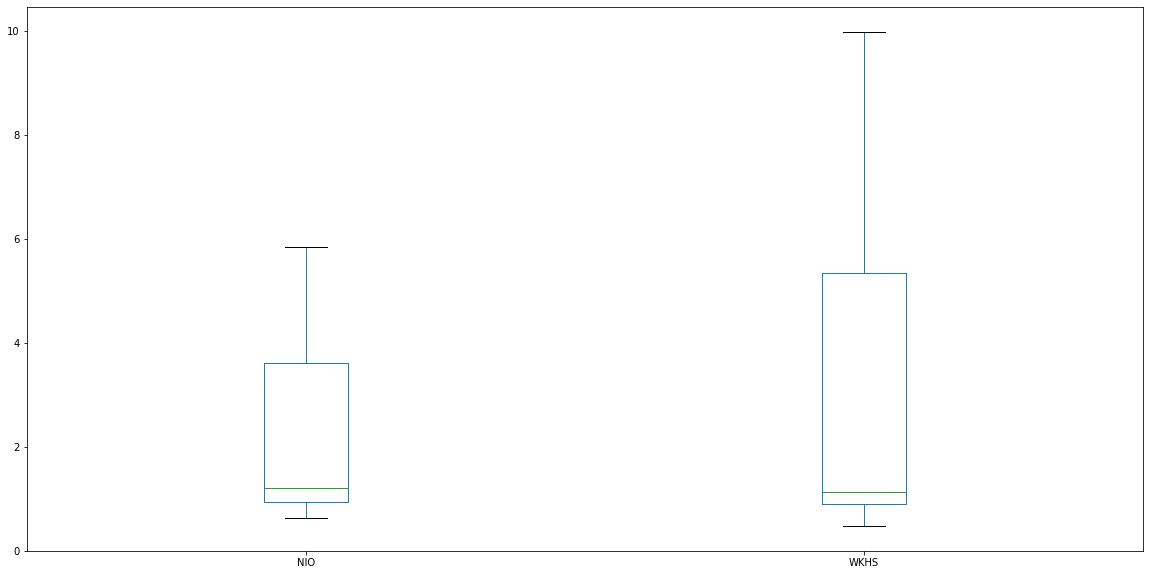

In [13]:
df_cumulative.plot.box(figsize=(20,10))

In [14]:
portfolio_std = df_daily_return.std()
portfolio_std

NIO     0.064904
WKHS    0.080147
dtype: float64

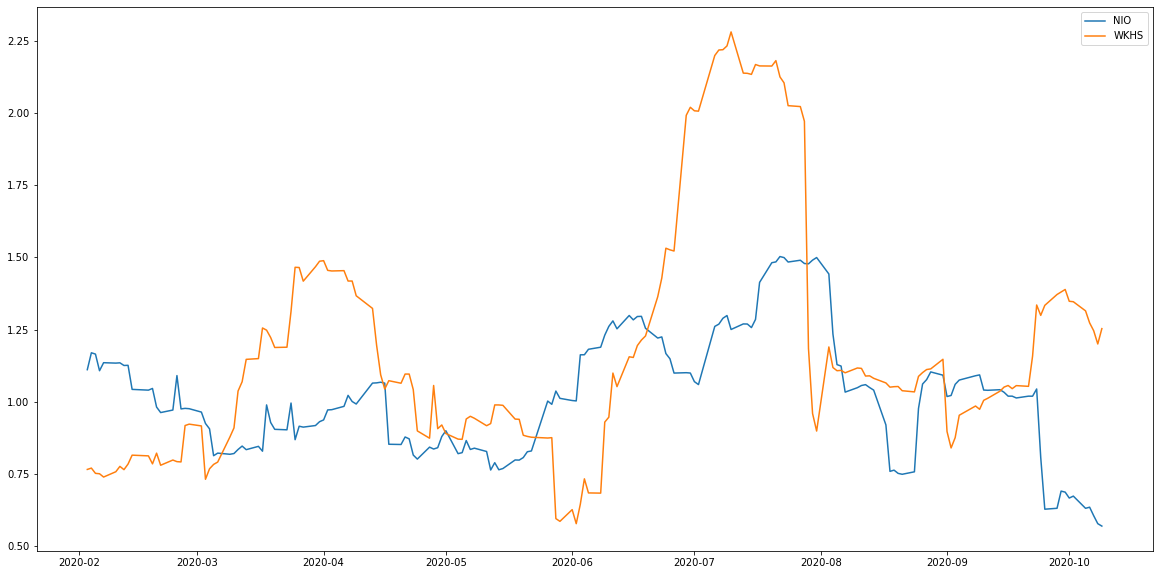

In [15]:
annualized_std = df_daily_return * np.sqrt(252)
annualized_std.rolling(window=21).std().plot(figsize=(20,10))

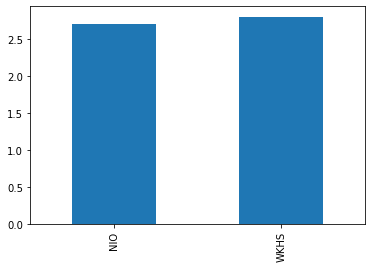

In [16]:
sharpe_ratios = (df_daily_return.mean() * 252) / (df_daily_return.std() * np.sqrt(252))
sharpe_ratios.plot(kind="bar")

In [17]:
###Format current date as ISO format
today = pd.Timestamp("2020-01-01", tz="America/New_York").isoformat()
end = pd.Timestamp("2021-01-01", tz="America/New_York").isoformat()
###Set the tickers
tickers = ["AMZN", "MSFT", "MRNA", "NVDA", "ZM"]
###Set timeframe to '1D' for Alpaca API
timeframe = "1D"
###Get current closing prices for SPY and AGG
best_stocks_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = end
).df

###Preview DataFrame
best_stocks_portfolio.head()

AMZN                                          \
                              open       high        low    close   volume   
2020-01-02 00:00:00-05:00  1874.79  1898.0000  1864.1500  1897.71  3583611   
2020-01-03 00:00:00-05:00  1864.50  1886.1965  1864.5000  1874.93  3293469   
2020-01-06 00:00:00-05:00  1860.00  1903.6900  1860.0000  1903.33  3598872   
2020-01-07 00:00:00-05:00  1904.50  1913.8900  1892.0433  1906.86  3569706   
2020-01-08 00:00:00-05:00  1898.68  1910.9999  1886.4448  1892.09  3100021   

                            MRNA                                 ...    NVDA  \
                            open    high    low  close   volume  ...    open   
2020-01-02 00:00:00-05:00  19.57  19.810  18.88  19.23  1095636  ...  238.75   
2020-01-03 00:00:00-05:00  19.02  19.360  18.72  18.89   895895  ...  235.10   
2020-01-06 00:00:00-05:00  18.70  18.760  18.01  18.12  1226236  ...  232.32   
2020-01-07 00:00:00-05:00  18.15  18.205  17.68  17.81  1253549  ...  238.20   
2020-01-08 00:00:00-05:00  17.99  18.080  17.76  17.96   858709  ...  239.76   

                                                                ZM           \
                             high      low   close   volume   open     high   
2020-01-02 00:00:00-05:00  239.91  236.720  239.86  5456281  68.80  69.2350   
2020-01-03 00:00:00-05:00  237.83  234.100  236.04  4713120  67.62  68.6800   
2020-01-06 00:00:00-05:00  237.27  231.270  237.03  5799284  66.63  70.4950   
2020-01-07 00:00:00-05:00  241.77  236.390  239.94  7237217  70.29  72.8391   
2020-01-08 00:00:00-05:00  242.04  238.149  240.49  6260748  71.81  73.2900   

                                                    
                               low  close   volume  
2020-01-02 00:00:00-05:00  68.0200  68.64  1285006  
2020-01-03 00:00:00-05:00  67.1000  67.28  1080659  
2020-01-06 00:00:00-05:00  65.8116  70.32  2969660  
2020-01-07 00:00:00-05:00  69.4500  71.90  6894638  
2020-01-08 00:00:00-05:00  71.0300  72.55  2417287  

[5 rows x 25 columns]

In [18]:
# Create an empty DataFrame for closing prices
df_best_stocks = pd.DataFrame()

# Fetch the closing prices of FB and TWTR
df_best_stocks["AMZN"] = best_stocks_portfolio["AMZN"]["close"]
df_best_stocks["MRNA"] = best_stocks_portfolio["MRNA"]["close"]
df_best_stocks["MSFT"] = best_stocks_portfolio["MSFT"]["close"]
df_best_stocks["NVDA"] = best_stocks_portfolio["NVDA"]["close"]
df_best_stocks["ZM"] = best_stocks_portfolio["ZM"]["close"]

# Drop the time component of the date
df_best_stocks.index = df_best_stocks.index.date

# Display sample data
df_best_stocks.head(10)

,AMZN,MRNA,MSFT,NVDA,ZM
2020-01-02,1897.71,19.230,160.73,239.86,68.64
2020-01-03,1874.93,18.890,158.59,236.04,67.28
2020-01-06,1903.33,18.120,159.02,237.03,70.32
2020-01-07,1906.86,17.810,157.60,239.94,71.90
2020-01-08,1892.09,17.960,160.14,240.49,72.55
2020-01-09,1901.00,18.403,162.09,243.02,72.62
2020-01-10,1882.98,19.120,161.32,244.33,73.07
2020-01-13,1891.41,20.260,163.28,251.98,74.01
2020-01-14,1869.20,19.990,162.15,247.29,73.16
2020-01-15,1862.01,20.240,163.29,245.57,76.91


In [19]:
##Join stocks
all_portfolios = pd.concat([df_best_stocks, df_closing_prices], axis="columns", join="inner")
all_portfolios.head()

,AMZN,MRNA,MSFT,NVDA,ZM,NIO,WKHS
2020-01-02,1897.71,19.23,160.73,239.86,68.64,3.720,3.07
2020-01-03,1874.93,18.89,158.59,236.04,67.28,3.830,3.07
2020-01-06,1903.33,18.12,159.02,237.03,70.32,3.690,3.22
2020-01-07,1906.86,17.81,157.60,239.94,71.90,3.250,3.28
2020-01-08,1892.09,17.96,160.14,240.49,72.55,3.385,3.39


In [20]:
all_daily_return = all_portfolios.pct_change()
all_daily_return.head()

,AMZN,MRNA,MSFT,NVDA,ZM,NIO,WKHS
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.012004,-0.017681,-0.013314,-0.015926,-0.019814,0.029570,0.000000
2020-01-06,0.015147,-0.040762,0.002711,0.004194,0.045184,-0.036554,0.048860
2020-01-07,0.001855,-0.017108,-0.008930,0.012277,0.022469,-0.119241,0.018634
2020-01-08,-0.007746,0.008422,0.016117,0.002292,0.009040,0.041538,0.033537


In [21]:
all_daily_return = all_daily_return.dropna().copy()
all_daily_return

,AMZN,MRNA,MSFT,NVDA,ZM,NIO,WKHS
2020-01-03,-0.012004,-0.017681,-0.013314,-0.015926,-0.019814,0.029570,0.000000
2020-01-06,0.015147,-0.040762,0.002711,0.004194,0.045184,-0.036554,0.048860
2020-01-07,0.001855,-0.017108,-0.008930,0.012277,0.022469,-0.119241,0.018634
2020-01-08,-0.007746,0.008422,0.016117,0.002292,0.009040,0.041538,0.033537
2020-01-09,0.004709,0.024666,0.012177,0.010520,0.000965,0.025111,0.020649
...,...,...,...,...,...,...,...
2020-10-05,0.023439,0.044470,0.020322,0.044442,0.006304,0.018868,0.035563
2020-10-06,-0.031230,-0.011549,-0.021201,0.006707,-0.014034,-0.043056,-0.021664
2020-10-07,0.030078,0.018159,0.018940,0.016747,0.004640,0.042574,0.011279
2020-10-08,-0.000614,0.008295,0.003908,-0.008540,-0.004556,-0.005104,-0.016942


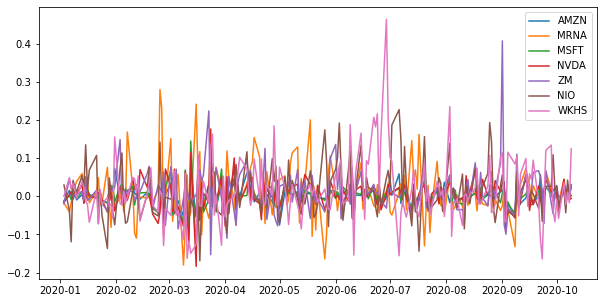

In [22]:
all_daily_return.plot(figsize=(10,5))

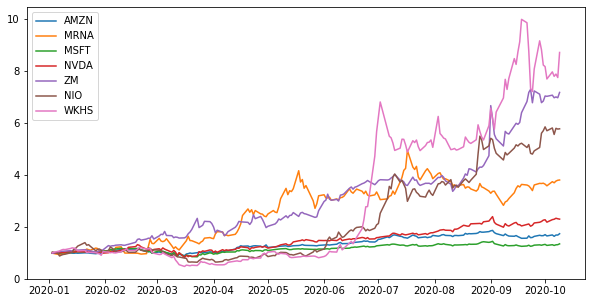

In [23]:
all_cumulative = (1 + all_daily_return).cumprod()
all_cumulative.plot(figsize=(10,5))

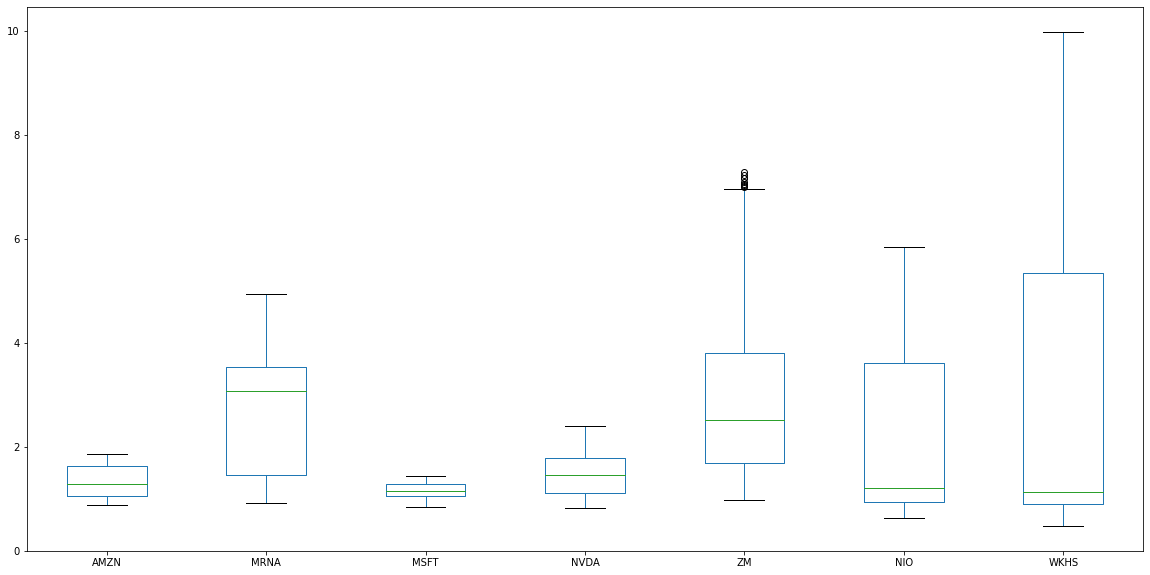

In [24]:
all_cumulative.plot.box(figsize=(20,10))

In [25]:
all_portfolio_std = all_daily_return.std()
all_portfolio_std

AMZN    0.025319
MRNA    0.065124
MSFT    0.030431
NVDA    0.039528
ZM      0.054913
NIO     0.064904
WKHS    0.080147
dtype: float64

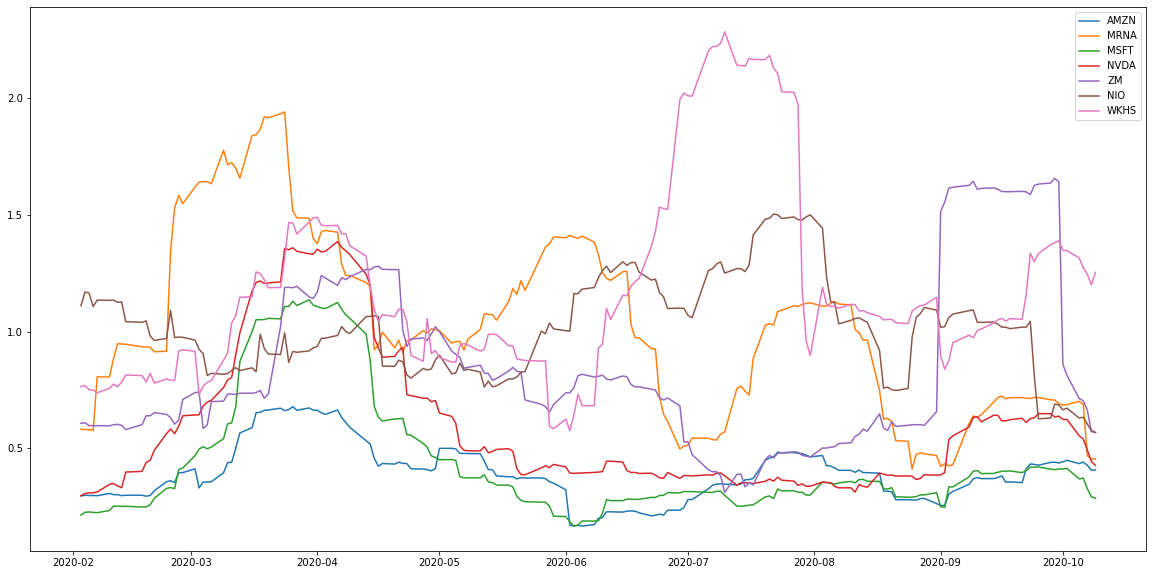

In [26]:
all_annualized_std = all_daily_return * np.sqrt(252)
all_annualized_std.rolling(window=21).std().plot(figsize=(20,10))

In [31]:
###Calculate and plot the correlation
all_correlation = all_portfolios.corr()
all_correlation

,AMZN,MRNA,MSFT,NVDA,ZM,NIO,WKHS
AMZN,1.000000,0.877176,0.952547,0.957011,0.856606,0.888398,0.856468
MRNA,0.877176,1.000000,0.805010,0.817187,0.754246,0.678947,0.672222
MSFT,0.952547,0.805010,1.000000,0.913562,0.771507,0.835253,0.800691
NVDA,0.957011,0.817187,0.913562,1.000000,0.931784,0.945830,0.904542
ZM,0.856606,0.754246,0.771507,0.931784,1.000000,0.918521,0.908843
NIO,0.888398,0.678947,0.835253,0.945830,0.918521,1.000000,0.960654
WKHS,0.856468,0.672222,0.800691,0.904542,0.908843,0.960654,1.000000


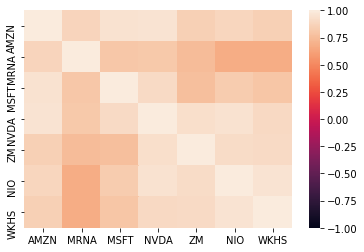

In [32]:
sns.heatmap(all_correlation, vmin=-1, vmax=1)

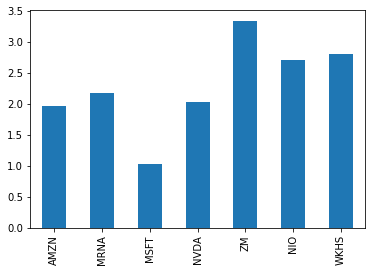

In [33]:
all_sharpe_ratios = (all_daily_return.mean() * 252) / (all_daily_return.std() * np.sqrt(252))
all_sharpe_ratios.plot(kind="bar")